# Style Transfer

## Use T4 Hardware accelerator

- Runtime
  - Change runtime type
    - Pick T4

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config; np_config.enable_numpy_behavior()

### Download and Upload the image.

I downloaded and uploaded the photos:

- For style: [https://imgur.com/9ooB60I](https://imgur.com/9ooB60I)
- For content: [https://i.imgur.com/F28w3Ac.jpg](https://i.imgur.com/F28w3Ac.jpg)

In [ ]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255.
    return img

content_image = load_img('content.jpeg')
style_1 = load_img('style.jpeg')

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def apply_style(content_image, style):
  content_image = content_image.reshape(1, content_image.shape[0], content_image.shape[1], content_image.shape[2]).astype('float32')
  content_image = tf.convert_to_tensor(content_image)
  style = cv2.resize(style, (256,256))
  style = style.reshape(1, style.shape[0], style.shape[1], style.shape[2]).astype('float32')
  outputs = model(tf.constant(content_image), tf.constant(style))
  stylized_image = outputs[0]
  return stylized_image

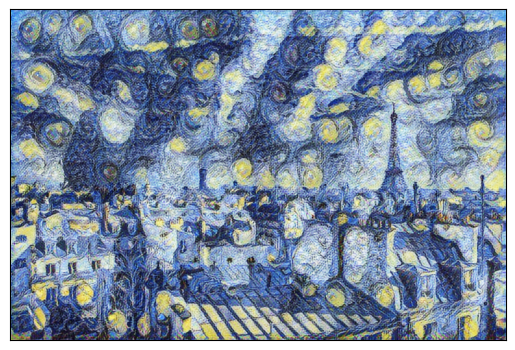

In [ ]:
img = apply_style(content_image, style_1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img[0])
plt.show()